In [1]:
# to handle datasets
import tensorflow as tf
import pandas as pd 
import numpy as np

# navigate folders
from glob import glob
import os

# for plotting
import matplotlib.pyplot as plt

# to open the images
import cv2

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns',None)

In [2]:
# data preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Evaluate model and seprate train and test
from sklearn.metrics import confusion_matrix

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# for the convolutional network
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import  ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing import image
from keras.utils import np_utils

# Load Images / Data

In [5]:
#here are all our images

DATA_FOLDER = 'v2-plant-seedlings-dataset'

In [6]:
# each weed class is in  a dedicated folder
os.listdir(DATA_FOLDER)

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'nonsegmentedv2',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [7]:
# walking over the dirctory structure to have image storage understanding

for class_folder_name in os.listdir(DATA_FOLDER):
    class_folder_path = os.path.join(DATA_FOLDER, class_folder_name)
    for image_path in glob(os.path.join(class_folder_path,"*.png")):
        print(image_path)

v2-plant-seedlings-dataset\Black-grass\1.png
v2-plant-seedlings-dataset\Black-grass\10.png
v2-plant-seedlings-dataset\Black-grass\100.png
v2-plant-seedlings-dataset\Black-grass\101.png
v2-plant-seedlings-dataset\Black-grass\102.png
v2-plant-seedlings-dataset\Black-grass\103.png
v2-plant-seedlings-dataset\Black-grass\104.png
v2-plant-seedlings-dataset\Black-grass\105.png
v2-plant-seedlings-dataset\Black-grass\106.png
v2-plant-seedlings-dataset\Black-grass\107.png
v2-plant-seedlings-dataset\Black-grass\108.png
v2-plant-seedlings-dataset\Black-grass\109.png
v2-plant-seedlings-dataset\Black-grass\11.png
v2-plant-seedlings-dataset\Black-grass\110.png
v2-plant-seedlings-dataset\Black-grass\111.png
v2-plant-seedlings-dataset\Black-grass\112.png
v2-plant-seedlings-dataset\Black-grass\113.png
v2-plant-seedlings-dataset\Black-grass\114.png
v2-plant-seedlings-dataset\Black-grass\115.png
v2-plant-seedlings-dataset\Black-grass\116.png
v2-plant-seedlings-dataset\Black-grass\117.png
v2-plant-seedling

v2-plant-seedlings-dataset\Charlock\355.png
v2-plant-seedlings-dataset\Charlock\356.png
v2-plant-seedlings-dataset\Charlock\357.png
v2-plant-seedlings-dataset\Charlock\358.png
v2-plant-seedlings-dataset\Charlock\359.png
v2-plant-seedlings-dataset\Charlock\36.png
v2-plant-seedlings-dataset\Charlock\360.png
v2-plant-seedlings-dataset\Charlock\361.png
v2-plant-seedlings-dataset\Charlock\362.png
v2-plant-seedlings-dataset\Charlock\363.png
v2-plant-seedlings-dataset\Charlock\364.png
v2-plant-seedlings-dataset\Charlock\365.png
v2-plant-seedlings-dataset\Charlock\366.png
v2-plant-seedlings-dataset\Charlock\367.png
v2-plant-seedlings-dataset\Charlock\368.png
v2-plant-seedlings-dataset\Charlock\369.png
v2-plant-seedlings-dataset\Charlock\37.png
v2-plant-seedlings-dataset\Charlock\370.png
v2-plant-seedlings-dataset\Charlock\371.png
v2-plant-seedlings-dataset\Charlock\372.png
v2-plant-seedlings-dataset\Charlock\373.png
v2-plant-seedlings-dataset\Charlock\374.png
v2-plant-seedlings-dataset\Charloc

v2-plant-seedlings-dataset\Common Chickweed\1.png
v2-plant-seedlings-dataset\Common Chickweed\10.png
v2-plant-seedlings-dataset\Common Chickweed\100.png
v2-plant-seedlings-dataset\Common Chickweed\101.png
v2-plant-seedlings-dataset\Common Chickweed\102.png
v2-plant-seedlings-dataset\Common Chickweed\103.png
v2-plant-seedlings-dataset\Common Chickweed\104.png
v2-plant-seedlings-dataset\Common Chickweed\105.png
v2-plant-seedlings-dataset\Common Chickweed\106.png
v2-plant-seedlings-dataset\Common Chickweed\107.png
v2-plant-seedlings-dataset\Common Chickweed\108.png
v2-plant-seedlings-dataset\Common Chickweed\109.png
v2-plant-seedlings-dataset\Common Chickweed\11.png
v2-plant-seedlings-dataset\Common Chickweed\110.png
v2-plant-seedlings-dataset\Common Chickweed\111.png
v2-plant-seedlings-dataset\Common Chickweed\112.png
v2-plant-seedlings-dataset\Common Chickweed\113.png
v2-plant-seedlings-dataset\Common Chickweed\114.png
v2-plant-seedlings-dataset\Common Chickweed\115.png
v2-plant-seedlin

v2-plant-seedlings-dataset\Common wheat\1.png
v2-plant-seedlings-dataset\Common wheat\10.png
v2-plant-seedlings-dataset\Common wheat\100.png
v2-plant-seedlings-dataset\Common wheat\101.png
v2-plant-seedlings-dataset\Common wheat\102.png
v2-plant-seedlings-dataset\Common wheat\103.png
v2-plant-seedlings-dataset\Common wheat\104.png
v2-plant-seedlings-dataset\Common wheat\105.png
v2-plant-seedlings-dataset\Common wheat\106.png
v2-plant-seedlings-dataset\Common wheat\107.png
v2-plant-seedlings-dataset\Common wheat\108.png
v2-plant-seedlings-dataset\Common wheat\109.png
v2-plant-seedlings-dataset\Common wheat\11.png
v2-plant-seedlings-dataset\Common wheat\110.png
v2-plant-seedlings-dataset\Common wheat\111.png
v2-plant-seedlings-dataset\Common wheat\112.png
v2-plant-seedlings-dataset\Common wheat\113.png
v2-plant-seedlings-dataset\Common wheat\114.png
v2-plant-seedlings-dataset\Common wheat\115.png
v2-plant-seedlings-dataset\Common wheat\116.png
v2-plant-seedlings-dataset\Common wheat\117.

v2-plant-seedlings-dataset\Fat Hen\329.png
v2-plant-seedlings-dataset\Fat Hen\33.png
v2-plant-seedlings-dataset\Fat Hen\330.png
v2-plant-seedlings-dataset\Fat Hen\331.png
v2-plant-seedlings-dataset\Fat Hen\332.png
v2-plant-seedlings-dataset\Fat Hen\333.png
v2-plant-seedlings-dataset\Fat Hen\334.png
v2-plant-seedlings-dataset\Fat Hen\335.png
v2-plant-seedlings-dataset\Fat Hen\336.png
v2-plant-seedlings-dataset\Fat Hen\337.png
v2-plant-seedlings-dataset\Fat Hen\338.png
v2-plant-seedlings-dataset\Fat Hen\339.png
v2-plant-seedlings-dataset\Fat Hen\34.png
v2-plant-seedlings-dataset\Fat Hen\340.png
v2-plant-seedlings-dataset\Fat Hen\341.png
v2-plant-seedlings-dataset\Fat Hen\342.png
v2-plant-seedlings-dataset\Fat Hen\343.png
v2-plant-seedlings-dataset\Fat Hen\344.png
v2-plant-seedlings-dataset\Fat Hen\345.png
v2-plant-seedlings-dataset\Fat Hen\346.png
v2-plant-seedlings-dataset\Fat Hen\347.png
v2-plant-seedlings-dataset\Fat Hen\348.png
v2-plant-seedlings-dataset\Fat Hen\349.png
v2-plant-seed

v2-plant-seedlings-dataset\Loose Silky-bent\21.png
v2-plant-seedlings-dataset\Loose Silky-bent\210.png
v2-plant-seedlings-dataset\Loose Silky-bent\211.png
v2-plant-seedlings-dataset\Loose Silky-bent\212.png
v2-plant-seedlings-dataset\Loose Silky-bent\213.png
v2-plant-seedlings-dataset\Loose Silky-bent\214.png
v2-plant-seedlings-dataset\Loose Silky-bent\215.png
v2-plant-seedlings-dataset\Loose Silky-bent\217.png
v2-plant-seedlings-dataset\Loose Silky-bent\218.png
v2-plant-seedlings-dataset\Loose Silky-bent\219.png
v2-plant-seedlings-dataset\Loose Silky-bent\22.png
v2-plant-seedlings-dataset\Loose Silky-bent\220.png
v2-plant-seedlings-dataset\Loose Silky-bent\221.png
v2-plant-seedlings-dataset\Loose Silky-bent\222.png
v2-plant-seedlings-dataset\Loose Silky-bent\223.png
v2-plant-seedlings-dataset\Loose Silky-bent\224.png
v2-plant-seedlings-dataset\Loose Silky-bent\225.png
v2-plant-seedlings-dataset\Loose Silky-bent\226.png
v2-plant-seedlings-dataset\Loose Silky-bent\227.png
v2-plant-seedl

v2-plant-seedlings-dataset\Maize\1.png
v2-plant-seedlings-dataset\Maize\10.png
v2-plant-seedlings-dataset\Maize\100.png
v2-plant-seedlings-dataset\Maize\101.png
v2-plant-seedlings-dataset\Maize\102.png
v2-plant-seedlings-dataset\Maize\103.png
v2-plant-seedlings-dataset\Maize\104.png
v2-plant-seedlings-dataset\Maize\105.png
v2-plant-seedlings-dataset\Maize\106.png
v2-plant-seedlings-dataset\Maize\107.png
v2-plant-seedlings-dataset\Maize\108.png
v2-plant-seedlings-dataset\Maize\109.png
v2-plant-seedlings-dataset\Maize\11.png
v2-plant-seedlings-dataset\Maize\110.png
v2-plant-seedlings-dataset\Maize\111.png
v2-plant-seedlings-dataset\Maize\112.png
v2-plant-seedlings-dataset\Maize\113.png
v2-plant-seedlings-dataset\Maize\114.png
v2-plant-seedlings-dataset\Maize\115.png
v2-plant-seedlings-dataset\Maize\116.png
v2-plant-seedlings-dataset\Maize\117.png
v2-plant-seedlings-dataset\Maize\118.png
v2-plant-seedlings-dataset\Maize\119.png
v2-plant-seedlings-dataset\Maize\12.png
v2-plant-seedlings-da

v2-plant-seedlings-dataset\Scentless Mayweed\312.png
v2-plant-seedlings-dataset\Scentless Mayweed\313.png
v2-plant-seedlings-dataset\Scentless Mayweed\314.png
v2-plant-seedlings-dataset\Scentless Mayweed\315.png
v2-plant-seedlings-dataset\Scentless Mayweed\316.png
v2-plant-seedlings-dataset\Scentless Mayweed\317.png
v2-plant-seedlings-dataset\Scentless Mayweed\318.png
v2-plant-seedlings-dataset\Scentless Mayweed\319.png
v2-plant-seedlings-dataset\Scentless Mayweed\32.png
v2-plant-seedlings-dataset\Scentless Mayweed\320.png
v2-plant-seedlings-dataset\Scentless Mayweed\321.png
v2-plant-seedlings-dataset\Scentless Mayweed\322.png
v2-plant-seedlings-dataset\Scentless Mayweed\323.png
v2-plant-seedlings-dataset\Scentless Mayweed\324.png
v2-plant-seedlings-dataset\Scentless Mayweed\325.png
v2-plant-seedlings-dataset\Scentless Mayweed\326.png
v2-plant-seedlings-dataset\Scentless Mayweed\327.png
v2-plant-seedlings-dataset\Scentless Mayweed\328.png
v2-plant-seedlings-dataset\Scentless Mayweed\32

v2-plant-seedlings-dataset\Shepherds Purse\54.png
v2-plant-seedlings-dataset\Shepherds Purse\55.png
v2-plant-seedlings-dataset\Shepherds Purse\56.png
v2-plant-seedlings-dataset\Shepherds Purse\57.png
v2-plant-seedlings-dataset\Shepherds Purse\58.png
v2-plant-seedlings-dataset\Shepherds Purse\59.png
v2-plant-seedlings-dataset\Shepherds Purse\6.png
v2-plant-seedlings-dataset\Shepherds Purse\60.png
v2-plant-seedlings-dataset\Shepherds Purse\61.png
v2-plant-seedlings-dataset\Shepherds Purse\63.png
v2-plant-seedlings-dataset\Shepherds Purse\64.png
v2-plant-seedlings-dataset\Shepherds Purse\65.png
v2-plant-seedlings-dataset\Shepherds Purse\66.png
v2-plant-seedlings-dataset\Shepherds Purse\67.png
v2-plant-seedlings-dataset\Shepherds Purse\68.png
v2-plant-seedlings-dataset\Shepherds Purse\69.png
v2-plant-seedlings-dataset\Shepherds Purse\7.png
v2-plant-seedlings-dataset\Shepherds Purse\70.png
v2-plant-seedlings-dataset\Shepherds Purse\71.png
v2-plant-seedlings-dataset\Shepherds Purse\72.png
v2

v2-plant-seedlings-dataset\Small-flowered Cranesbill\511.png
v2-plant-seedlings-dataset\Small-flowered Cranesbill\512.png
v2-plant-seedlings-dataset\Small-flowered Cranesbill\513.png
v2-plant-seedlings-dataset\Small-flowered Cranesbill\514.png
v2-plant-seedlings-dataset\Small-flowered Cranesbill\515.png
v2-plant-seedlings-dataset\Small-flowered Cranesbill\516.png
v2-plant-seedlings-dataset\Small-flowered Cranesbill\517.png
v2-plant-seedlings-dataset\Small-flowered Cranesbill\518.png
v2-plant-seedlings-dataset\Small-flowered Cranesbill\519.png
v2-plant-seedlings-dataset\Small-flowered Cranesbill\52.png
v2-plant-seedlings-dataset\Small-flowered Cranesbill\520.png
v2-plant-seedlings-dataset\Small-flowered Cranesbill\521.png
v2-plant-seedlings-dataset\Small-flowered Cranesbill\522.png
v2-plant-seedlings-dataset\Small-flowered Cranesbill\523.png
v2-plant-seedlings-dataset\Small-flowered Cranesbill\524.png
v2-plant-seedlings-dataset\Small-flowered Cranesbill\525.png
v2-plant-seedlings-datase

v2-plant-seedlings-dataset\Sugar beet\419.png
v2-plant-seedlings-dataset\Sugar beet\42.png
v2-plant-seedlings-dataset\Sugar beet\420.png
v2-plant-seedlings-dataset\Sugar beet\421.png
v2-plant-seedlings-dataset\Sugar beet\422.png
v2-plant-seedlings-dataset\Sugar beet\423.png
v2-plant-seedlings-dataset\Sugar beet\424.png
v2-plant-seedlings-dataset\Sugar beet\425.png
v2-plant-seedlings-dataset\Sugar beet\426.png
v2-plant-seedlings-dataset\Sugar beet\427.png
v2-plant-seedlings-dataset\Sugar beet\428.png
v2-plant-seedlings-dataset\Sugar beet\429.png
v2-plant-seedlings-dataset\Sugar beet\43.png
v2-plant-seedlings-dataset\Sugar beet\430.png
v2-plant-seedlings-dataset\Sugar beet\431.png
v2-plant-seedlings-dataset\Sugar beet\432.png
v2-plant-seedlings-dataset\Sugar beet\433.png
v2-plant-seedlings-dataset\Sugar beet\434.png
v2-plant-seedlings-dataset\Sugar beet\435.png
v2-plant-seedlings-dataset\Sugar beet\436.png
v2-plant-seedlings-dataset\Sugar beet\437.png
v2-plant-seedlings-dataset\Sugar bee

In [8]:
# creating  a dataframe having image path in one column and target class in other
images_df = []

# navigate within each folder
for class_folder_name in os.listdir(DATA_FOLDER):
    class_folder_path = os.path.join(DATA_FOLDER, class_folder_name)
    
    # collect every image path
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        
        tmp = pd.DataFrame([image_path, class_folder_name]).T
        images_df.append(tmp)

# concatenate the final df
images_df = pd.concat(images_df, axis=0, ignore_index=True)
images_df.columns = ['image', 'target']
images_df.head(10)
    

,image,target
0,v2-plant-seedlings-dataset\Black-grass\1.png,Black-grass
1,v2-plant-seedlings-dataset\Black-grass\10.png,Black-grass
2,v2-plant-seedlings-dataset\Black-grass\100.png,Black-grass
3,v2-plant-seedlings-dataset\Black-grass\101.png,Black-grass
4,v2-plant-seedlings-dataset\Black-grass\102.png,Black-grass
5,v2-plant-seedlings-dataset\Black-grass\103.png,Black-grass
6,v2-plant-seedlings-dataset\Black-grass\104.png,Black-grass
7,v2-plant-seedlings-dataset\Black-grass\105.png,Black-grass
8,v2-plant-seedlings-dataset\Black-grass\106.png,Black-grass
9,v2-plant-seedlings-dataset\Black-grass\107.png,Black-grass


In [9]:
# no of images per target class
images_df['target'].value_counts()

Loose Silky-bent             762
Common Chickweed             713
Scentless Mayweed            607
Small-flowered Cranesbill    576
Fat Hen                      538
Sugar beet                   463
Charlock                     452
Cleavers                     335
Black-grass                  309
Shepherds Purse              274
Maize                        257
Common wheat                 253
Name: target, dtype: int64

In [10]:
# isolating sample image path for demo
images_df.loc[0,'image']

'v2-plant-seedlings-dataset\\Black-grass\\1.png'

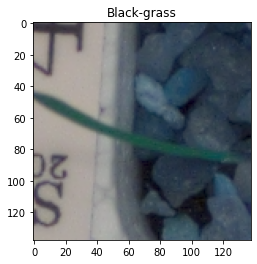

In [11]:
# visualizing  few images

def plot_single_image(df, image_number):
    im = cv2.imread(df.loc[image_number, 'image'])
    plt.title(df.loc[image_number, 'target'])
    plt.imshow(im)
    
plot_single_image(images_df, 0)

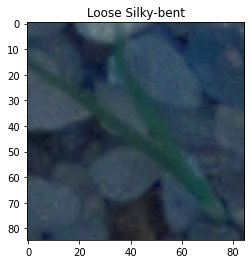

In [12]:
plot_single_image(images_df, 3000)

In [13]:
# plotting a bunch of images all together

def plot_for_class(df, label):
    # function plots  9 images
    nb_rows = 3
    nb_cols = 3
    
    fig, axs = plt.subplots(nb_rows,nb_cols , figsize=(10, 10))
    
    n = 0
    for i in range(0, nb_rows):
        for j in range (0, nb_cols):
            tmp = df[df['target'] == label]
            tmp.reset_index(drop= True , inplace = True)
            im = cv2.imread(tmp.loc[n, 'image'])
            axs[i,j].imshow(im)
            n   += 1

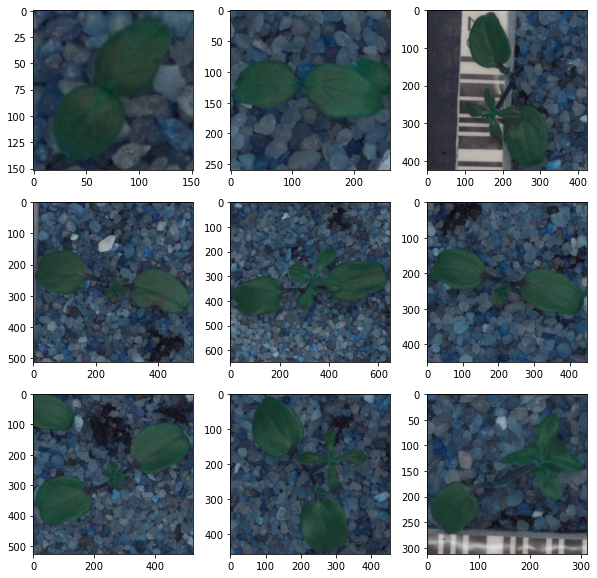

In [14]:
plot_for_class(images_df, 'Cleavers')

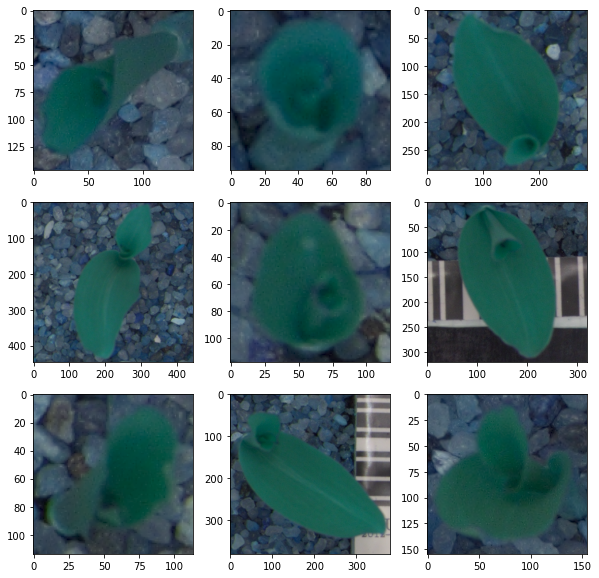

In [15]:
plot_for_class(images_df, 'Maize')

# Seprate train and test

In [16]:
# train_test_split

X_train, X_test , y_train, y_test = train_test_split(images_df['image'], images_df['target'],test_size = 0.20, random_state=101)

print(X_train.shape)
print(X_test.shape)

(4431,)
(1108,)


In [17]:
# indices of training data are mixed and can led to cause problem

X_train.head()

1922      v2-plant-seedlings-dataset\Common wheat\204.png
4164    v2-plant-seedlings-dataset\Scentless Mayweed\5...
2952    v2-plant-seedlings-dataset\Loose Silky-bent\43...
287          v2-plant-seedlings-dataset\Black-grass\8.png
4971    v2-plant-seedlings-dataset\Small-flowered Cran...
Name: image, dtype: object

In [18]:
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)

X_train.head()

0      v2-plant-seedlings-dataset\Common wheat\204.png
1    v2-plant-seedlings-dataset\Scentless Mayweed\5...
2    v2-plant-seedlings-dataset\Loose Silky-bent\43...
3         v2-plant-seedlings-dataset\Black-grass\8.png
4    v2-plant-seedlings-dataset\Small-flowered Cran...
Name: image, dtype: object

In [19]:
# reset index in target as well 
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [20]:
# percentage of images within each class

y_train.value_counts()/len(y_train)

Loose Silky-bent             0.138118
Common Chickweed             0.129542
Scentless Mayweed            0.111262
Small-flowered Cranesbill    0.103363
Fat Hen                      0.095012
Sugar beet                   0.084180
Charlock                     0.082148
Cleavers                     0.060032
Black-grass                  0.055969
Shepherds Purse              0.051230
Common wheat                 0.044911
Maize                        0.044234
Name: target, dtype: float64

In [21]:
# checking above should be same in test set

y_test.value_counts()/len(y_test)

Loose Silky-bent             0.135379
Common Chickweed             0.125451
Small-flowered Cranesbill    0.106498
Fat Hen                      0.105596
Scentless Mayweed            0.102888
Sugar beet                   0.081227
Charlock                     0.079422
Cleavers                     0.062274
Black-grass                  0.055054
Maize                        0.055054
Common wheat                 0.048736
Shepherds Purse              0.042419
Name: target, dtype: float64

In [22]:
# doing one-hot encoding of target since problem is multi-class classification
encoder = LabelEncoder()
encoder.fit(y_train)

train_y = np_utils.to_categorical(encoder.transform(y_train))
test_y = np_utils.to_categorical(encoder.transform(y_test))

train_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [23]:
# Ensuring all images size should be the same
IMAGE_SIZE = 150

In [24]:
def im_resize(df, n):
    im = cv2.imread(df[n])
    im = cv2.resize(im,(IMAGE_SIZE,IMAGE_SIZE))
    return im

In [25]:
tmp = im_resize(X_train,7)
tmp.shape

(150, 150, 3)

In [26]:
# the shape of the datasets needs to be (n1, n2, n3, n4)
# where n1 is the number of observations
# n2 and n3 are image width and length
# and n4 indicates that it is a color image, so 3 planes per image

def create_dataset(df,image_size):
    # this function creates dataset as required for cnn
    tmp = np.zeros((len(df),image_size,image_size,3), dtype='float32')
    
    for n in range(0,len(df)):
        im = im_resize(df,n)
        tmp[n] = im
        
    print('Dataset Images shape:{} size:{:,}'.format(tmp.shape,tmp.size))
    return tmp

In [27]:
x_train = create_dataset(X_train, IMAGE_SIZE)

Dataset Images shape:(4431, 150, 150, 3) size:299,092,500


In [28]:
x_test = create_dataset(X_test, IMAGE_SIZE)

Dataset Images shape:(1108, 150, 150, 3) size:74,790,000


In [29]:
# number of different classes
len(y_train.unique())

12

In [30]:
# This is our required cnn

kernel_size = (3,3)
pool_size = (2,2)
first_filters = 32
second_filters = 64
third_filters = 128

dropout_conv = 0.3
dropout_dense = 0.3

model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation = 'relu',
                input_shape = (IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(Conv2D(first_filters,kernel_size,activation = 'relu'))

#model.add(Conv2D(first_filters, kernel_size, activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters,kernel_size,activation='relu'))
model.add(Conv2D(second_filters,kernel_size,activation='relu'))
# model.add(Conv2D(second_filters,kernel_size,activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filters,kernel_size,activation='relu'))
model.add(Conv2D(third_filters,kernel_size,activation='relu'))
#model.add(Conv2D(third_filters, kernel_size, activation ='relu'))

model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(dropout_conv))

model.add(Flatten())
model.add(Dense(256,activation = "relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(12,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 64)        0

In [31]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [32]:
model.compile( loss='binary_crossentropy',optimizer=opt, 
              metrics=['accuracy'])

In [34]:
batch_size = 10
epochs = 8

In [38]:
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='acc', factor=0.5, patience=1, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
#callbacks_list = [checkpoint, reduce_lr]

history = model.fit(x=x_train, y=train_y,
                    batch_size=batch_size, 
                    epochs=epochs,
                    verbose=2,
                    callbacks=[checkpoint, reduce_lr])

Epoch 1/8
444/444 - 229s - loss: 0.4271 - accuracy: 0.1679
Epoch 2/8
444/444 - 306s - loss: 0.2394 - accuracy: 0.3719
Epoch 3/8
444/444 - 321s - loss: 0.2016 - accuracy: 0.4850
Epoch 4/8
444/444 - 225s - loss: 0.1651 - accuracy: 0.6066
Epoch 5/8
444/444 - 226s - loss: 0.1493 - accuracy: 0.6527
Epoch 6/8
444/444 - 227s - loss: 0.1247 - accuracy: 0.7276
Epoch 7/8
444/444 - 230s - loss: 0.1103 - accuracy: 0.7682
Epoch 8/8
444/444 - 298s - loss: 0.0967 - accuracy: 0.8028


In [40]:
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()
plt.figure()

KeyError: 'acc'

In [35]:
# make a prediction
predictions = model.predict_classes(x_test,verbose =1)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
# inspect predictions
predictions

In [ ]:
# transform target
encoder.transform(y_test)

In [ ]:
# create a dict to map back the numbers onto the classes

tmp = pd.concat([y_test, pd.Series(encoder.transform(y_test))], axis =1)
tmp.columns = ['class_name','class_number']
tmp.drop_duplicates(inplace = True)
tmp.reset_index(drop=True, inplace=True)
tmp = pd.Series(tmp.class_name.values, index = tmp.class_number).to_dict()
tmp

In [ ]:
# these we will display in the below matrix
abbreviation = ['BG', 'Ch', 'Cl', 'CC', 'CW', 'FH', 'LSB', 'M', 'SM', 'SP', 'SFC', 'SB']

NameError: name 'cnf_matrix' is not defined

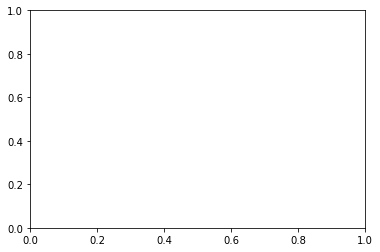

In [42]:
import seaborn as sns

fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Greens, annot=True)
ax.set_xticklabels(abbreviation)
ax.set_yticklabels(abbreviation)
plt.title('Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
#fig.savefig('Confusion matrix.png', dpi=300)
plt.show();

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(encoder.transform(y_test), predictions, normalize=True, sample_weight = None)